# Assignment 1 for PUI2016 Homework 5
**Name**: Cheng Hou

**NetID**: ch3019

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [30]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()

In [31]:
df["age"] = int(datestring[:4]) - df['birth year'][(df['usertype'] == 'Subscriber')]

In [37]:
age = df["age"].dropna()

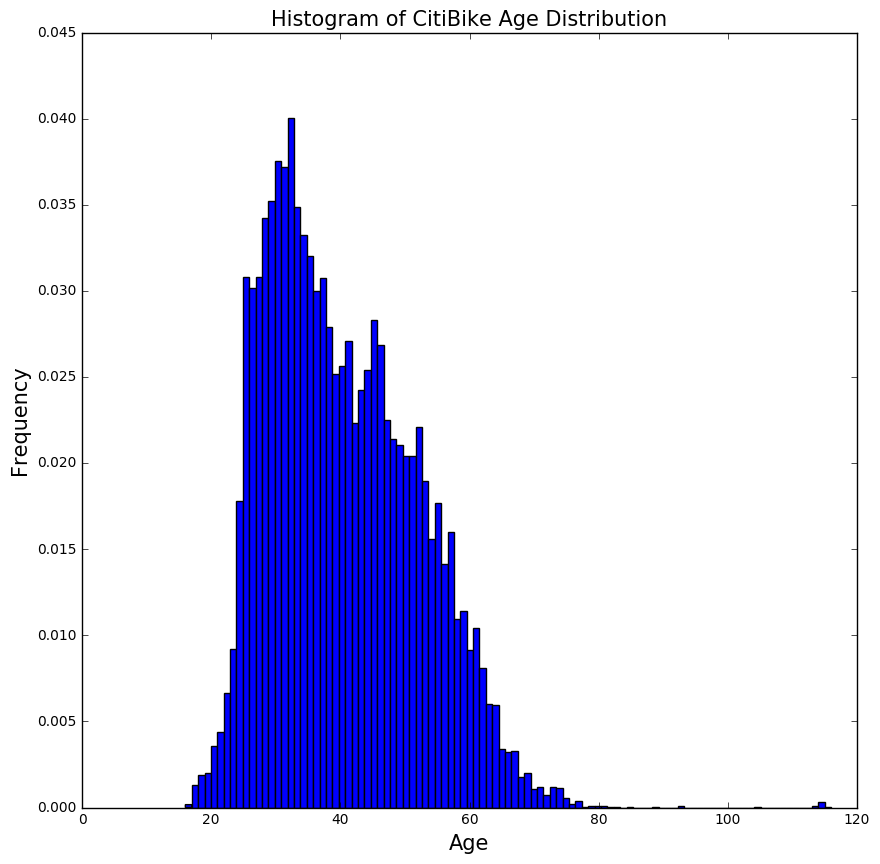

In [55]:
pl.figure(figsize = (10, 10))

pl.hist(age, bins = age.max() - age.min() + 1, normed = True)

pl.title("Histogram of CitiBike Age Distribution", fontsize = 15)
pl.ylabel("Frequency", fontsize = 15); 
pl.xlabel("Age", fontsize = 15)

plt.show()

## 1.Test whether a gaussian model $N(\mu,\sigma)$ for the age distribution of citibike drivers is a sensible model
### NULL HYPOTHESIS:
### $H_0:$ Gaussian distribution with the same mean and standard deviation is a sensible model for age distribution.
### ALTERNATIVE HYPOTHESIS:
### $H_1:$ Gaussian distribution is not a sensible model for age distribution.
### Significance Level： $\alpha = 0.05$

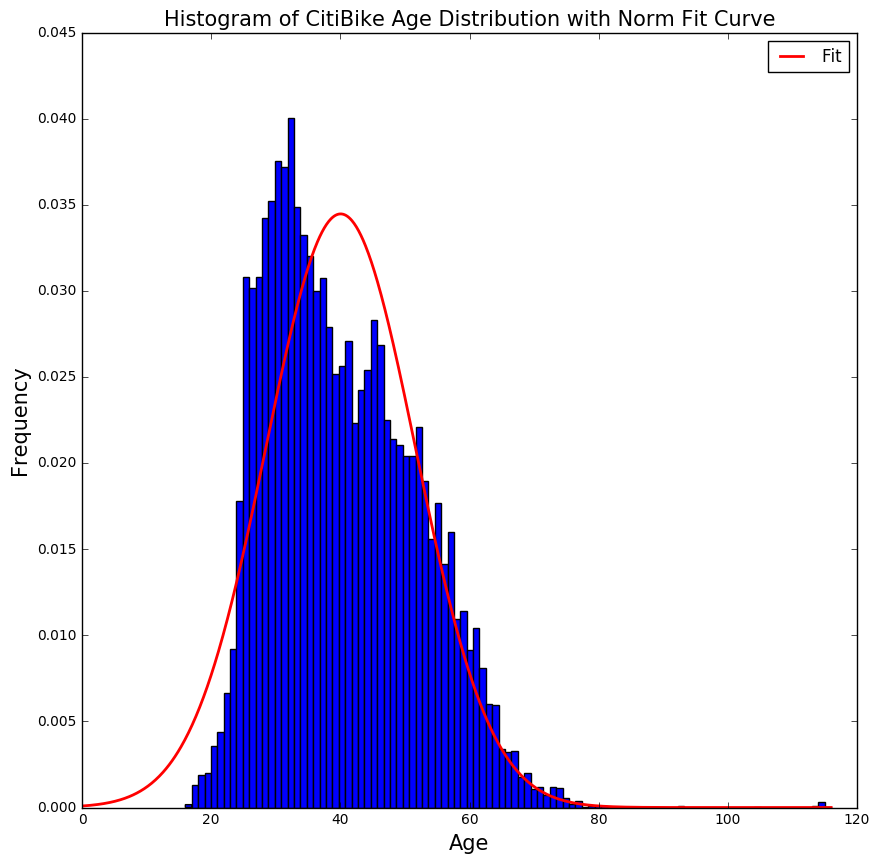

In [57]:
pl.figure(figsize = (10, 10))

xspace = np.linspace(0,age.max(),1000)
fit = st.norm.pdf(xspace, np.mean(age), np.std(age))

pl.hist(age, bins = age.max() - age.min() + 1, normed = True)
pl.plot(xspace, fit, c = "r", lw = 2, label = 'Fit')

pl.title("Histogram of CitiBike Age Distribution with Norm Fit Curve", fontsize = 15)
pl.ylabel("Frequency", fontsize = 15); 
pl.xlabel("Age", fontsize = 15)
pl.legend()

plt.show()

### 1.1 KS Test

In [69]:
st.kstest(age, "norm", args=(np.mean(age), np.std(age)))

KstestResult(statistic=0.087552395335024624, pvalue=0.0)

#### The p value is much smaller than the significance level. We can reject the null hypothesis and accept the alternative hypothesis.

### 1.2 AD Test

In [58]:
st.anderson(age, 'norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### Critical value is 0.787 when $\alpha = 5 \%$. We can reject the null hypothesis and accept the alternative hypothesis.

## 2.Test whether a logistic model for the age distribution of citibike drivers is a sensible model
### NULL HYPOTHESIS:
### $H_0:$ Logistic distribution is a sensible model for age distribution.
### ALTERNATIVE HYPOTHESIS:
### $H_1:$ Logistic distribution is not a sensible model for age distribution.
### Significance Level： $\alpha = 0.05$

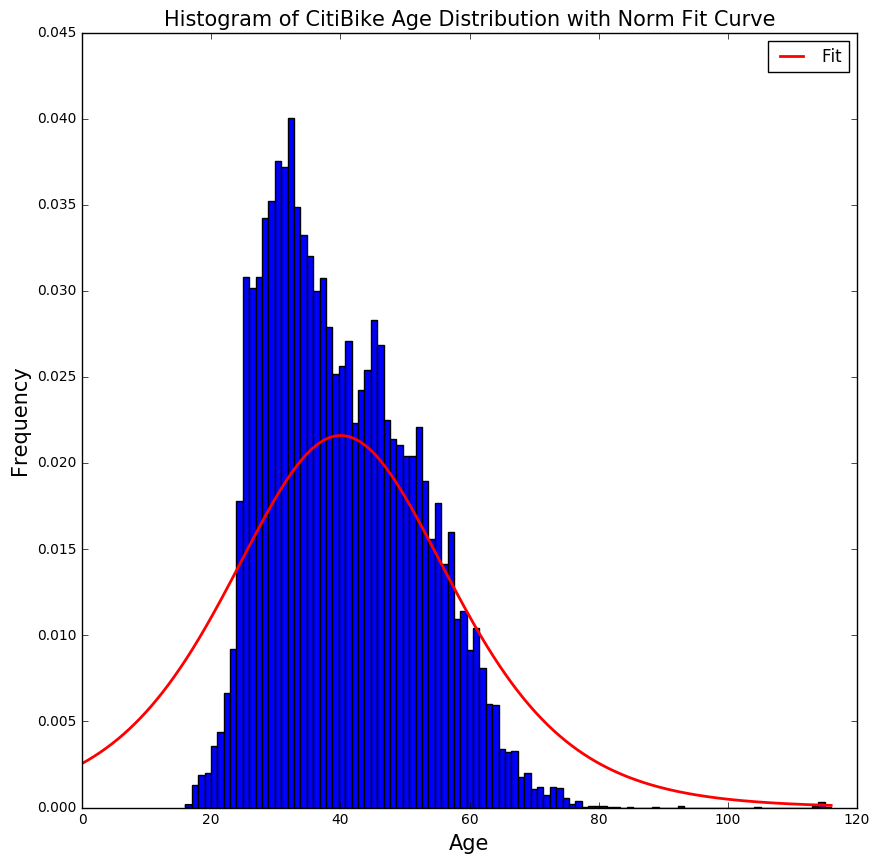

In [66]:
pl.figure(figsize = (10, 10))

xspace = np.linspace(0,age.max(),1000)
fit = st.logistic.pdf(xspace, np.mean(age), np.std(age))

pl.hist(age, bins = age.max() - age.min() + 1, normed = True)
pl.plot(xspace, fit, c = "r", lw = 2, label = 'Fit')

pl.title("Histogram of CitiBike Age Distribution with Norm Fit Curve", fontsize = 15)
pl.ylabel("Frequency", fontsize = 15); 
pl.xlabel("Age", fontsize = 15)
pl.legend()

plt.show()

### 2.1 KS Test

In [70]:
st.kstest(age, "logistic", args=(np.mean(age), np.std(age)))

KstestResult(statistic=0.17107906457772712, pvalue=0.0)

#### The p value is much smaller than the significance level. We can reject the null hypothesis and accept the alternative hypothesis.

### 2.2 AD Test

In [71]:
st.anderson(age, 'logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

#### Critical value is 0.66 when $\alpha = 5 \%$. We can reject the null hypothesis and accept the alternative hypothesis.